# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


Bad key "text.kerning_factor" on line 4 in
/Users/mat.arruda/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 651


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = 'metric'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'{url}appid={weather_api_key}&units={units}&q='
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url + city).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country
        # and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | albany
Processing Record 2 of Set 1 | qaanaaq
Processing Record 3 of Set 1 | zamora
Processing Record 4 of Set 1 | caucaia
Processing Record 5 of Set 1 | lagoa
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | avera
Processing Record 9 of Set 1 | hilo
Processing Record 10 of Set 1 | hobart
Processing Record 11 of Set 1 | haines junction
Processing Record 12 of Set 1 | jamestown
Processing Record 13 of Set 1 | hithadhoo
Processing Record 14 of Set 1 | solnechnyy
Processing Record 15 of Set 1 | barrow
Processing Record 16 of Set 1 | busselton
Processing Record 17 of Set 1 | port alfred
Processing Record 18 of Set 1 | pevek
Processing Record 19 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 20 of Set 1 | jardim
Processing Record 21 of Set 1 | moree
Processing Record 22 of Set 1 | ancud
Processing Record 23 of Set 1 | t

Processing Record 38 of Set 4 | ponta do sol
Processing Record 39 of Set 4 | bathsheba
Processing Record 40 of Set 4 | bethel
Processing Record 41 of Set 4 | kieta
Processing Record 42 of Set 4 | kegayli
City not found. Skipping...
Processing Record 43 of Set 4 | half moon bay
Processing Record 44 of Set 4 | kodino
Processing Record 45 of Set 4 | ahipara
Processing Record 46 of Set 4 | north bend
Processing Record 47 of Set 4 | asau
Processing Record 48 of Set 4 | new norfolk
Processing Record 49 of Set 4 | salinopolis
Processing Record 0 of Set 5 | konza
Processing Record 1 of Set 5 | rauma
Processing Record 2 of Set 5 | chapais
Processing Record 3 of Set 5 | darhan
Processing Record 4 of Set 5 | bengkulu
Processing Record 5 of Set 5 | sao filipe
Processing Record 6 of Set 5 | padang
Processing Record 7 of Set 5 | bambanglipuro
Processing Record 8 of Set 5 | broome
Processing Record 9 of Set 5 | tsienyane
City not found. Skipping...
Processing Record 10 of Set 5 | nuristan
Processing 

Processing Record 28 of Set 8 | bolungarvik
City not found. Skipping...
Processing Record 29 of Set 8 | moranbah
Processing Record 30 of Set 8 | ormara
Processing Record 31 of Set 8 | saleaula
City not found. Skipping...
Processing Record 32 of Set 8 | grootfontein
Processing Record 33 of Set 8 | matadi
Processing Record 34 of Set 8 | severo-kurilsk
Processing Record 35 of Set 8 | mercedes
Processing Record 36 of Set 8 | sokolo
Processing Record 37 of Set 8 | havoysund
Processing Record 38 of Set 8 | skalistyy
City not found. Skipping...
Processing Record 39 of Set 8 | sringeri
Processing Record 40 of Set 8 | waddan
Processing Record 41 of Set 8 | kiili
Processing Record 42 of Set 8 | calama
Processing Record 43 of Set 8 | jinchang
Processing Record 44 of Set 8 | egvekinot
Processing Record 45 of Set 8 | vila franca do campo
Processing Record 46 of Set 8 | sitka
Processing Record 47 of Set 8 | boyolangu
Processing Record 48 of Set 8 | lakes entrance
Processing Record 49 of Set 8 | nant

Processing Record 15 of Set 12 | mufumbwe
Processing Record 16 of Set 12 | lima
Processing Record 17 of Set 12 | kochinda
Processing Record 18 of Set 12 | ripky
Processing Record 19 of Set 12 | tautira
Processing Record 20 of Set 12 | hasaki
Processing Record 21 of Set 12 | hofn
Processing Record 22 of Set 12 | kiunga
Processing Record 23 of Set 12 | marsa matruh
Processing Record 24 of Set 12 | casino
Processing Record 25 of Set 12 | piacabucu
Processing Record 26 of Set 12 | okha
Processing Record 27 of Set 12 | mathathane
Processing Record 28 of Set 12 | vengerovo
Processing Record 29 of Set 12 | port hardy
Processing Record 30 of Set 12 | zemio
Processing Record 31 of Set 12 | ondjiva
Processing Record 32 of Set 12 | nemuro
Processing Record 33 of Set 12 | olimpia
Processing Record 34 of Set 12 | marsaxlokk
Processing Record 35 of Set 12 | magdagachi
Processing Record 36 of Set 12 | santo tomas
Processing Record 37 of Set 12 | treinta y tres
Processing Record 38 of Set 12 | anshun


In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          607
Lat           607
Lng           607
Max Temp      607
Humidity      607
Cloudiness    607
Wind Speed    607
Country       607
Date          607
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,albany,42.6001,-73.9662,-6.34,64,11,2.80,US,1675303801
1,qaanaaq,77.4840,-69.3632,-23.11,64,0,3.77,GL,1675303810
2,zamora,-4.0692,-78.9567,20.46,98,92,0.36,EC,1675304494
3,caucaia,-3.7361,-38.6531,27.24,79,40,2.57,BR,1675304494
4,lagoa,39.0500,-27.9833,13.68,70,4,3.16,PT,1675303950


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,albany,42.6001,-73.9662,-6.34,64,11,2.80,US,1675303801
1,qaanaaq,77.4840,-69.3632,-23.11,64,0,3.77,GL,1675303810
2,zamora,-4.0692,-78.9567,20.46,98,92,0.36,EC,1675304494
3,caucaia,-3.7361,-38.6531,27.24,79,40,2.57,BR,1675304494
4,lagoa,39.0500,-27.9833,13.68,70,4,3.16,PT,1675303950


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

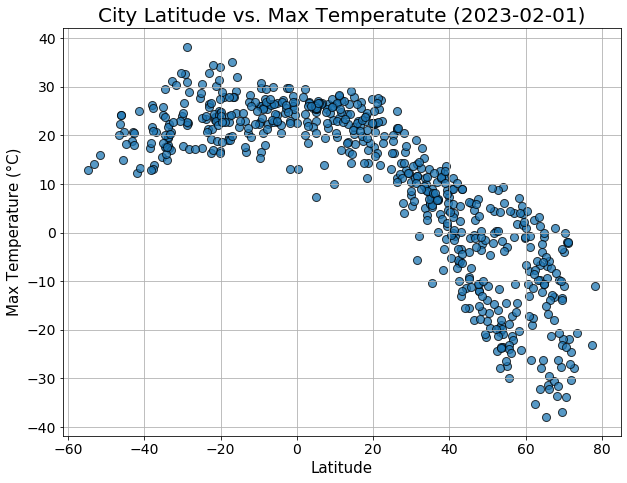

In [8]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot.scatter(x = 'Lat', y = 'Max Temp',marker = 'o', edgecolors = 'black',\
                          s = 65, alpha = 0.75, figsize = (10, 7.5))

# Incorporate the other graph properties
plt.xlabel('Latitude', fontsize = 15)
plt.ylabel('Max Temperature (°C)', fontsize = 15)
plt.title('City Latitude vs. Max Temperatute (2023-02-01)', fontsize = 20)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

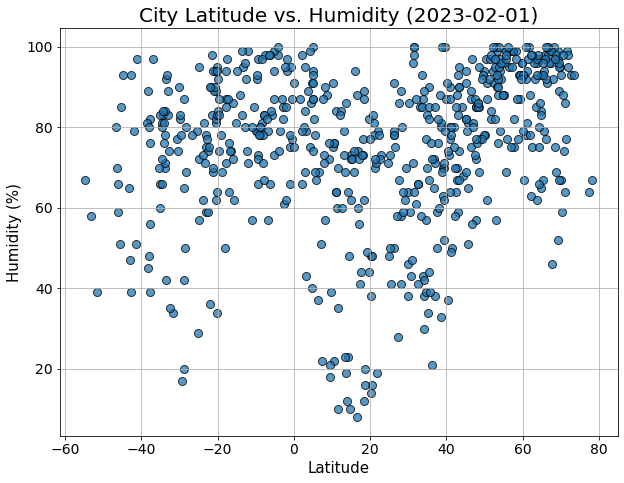

In [9]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot.scatter(x = 'Lat', y = 'Humidity', marker = 'o', edgecolors = 'black',\
                          s = 65, alpha = 0.75, figsize = (10, 7.5))

# Incorporate the other graph properties
plt.xlabel('Latitude', fontsize = 15)
plt.ylabel('Humidity (%)', fontsize = 15)
plt.title('City Latitude vs. Humidity (2023-02-01)', fontsize = 20)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

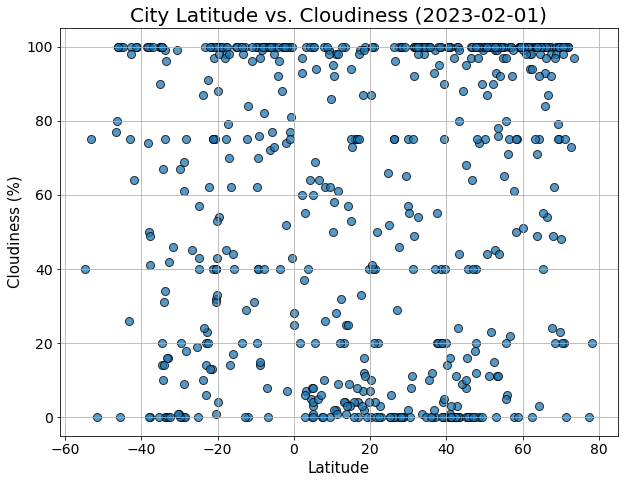

In [10]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot.scatter(x = 'Lat', y = 'Cloudiness', marker = 'o', edgecolors = 'black',\
                          s = 65, alpha = 0.75, figsize = (10, 7.5))

# Incorporate the other graph properties
plt.xlabel('Latitude', fontsize = 15)
plt.ylabel('Cloudiness (%)', fontsize = 15)
plt.title('City Latitude vs. Cloudiness (2023-02-01)', fontsize = 20)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

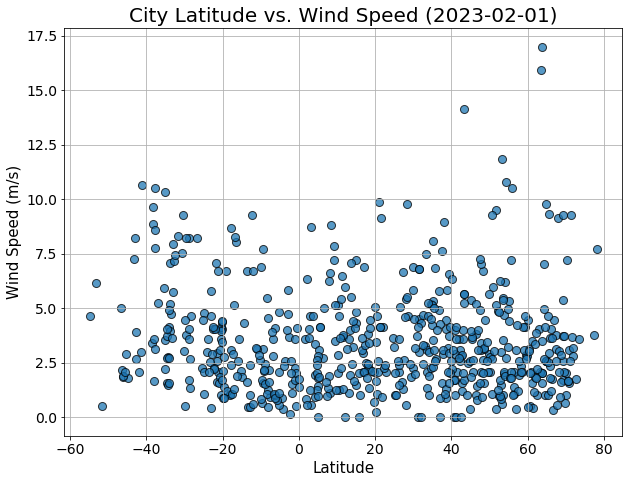

In [11]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot.scatter(x = 'Lat', y = 'Wind Speed', marker = 'o', edgecolors = 'black',\
                          s = 65, alpha = 0.75, figsize = (10, 7.5))

# Incorporate the other graph properties
plt.xlabel('Latitude', fontsize = 15)
plt.ylabel('Wind Speed (m/s)', fontsize = 15)
plt.title('City Latitude vs. Wind Speed (2023-02-01)', fontsize = 20)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def lin_reg_plot(data, x_name, y_name):
    x = data[x_name]
    y = data[y_name]
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    print(f'The r-value is: {rvalue}.')
    
    plt.scatter(x, y, marker = 'o', edgecolors = 'black', s = 65, alpha = 0.75)
    plt.xlabel(x_name)
    plt.ylabel(y_name)
    plt.plot(x, regress_values, 'r-')
    plt.show()
    
    print(line_eq)

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,albany,42.6001,-73.9662,-6.34,64,11,2.80,US,1675303801
1,qaanaaq,77.4840,-69.3632,-23.11,64,0,3.77,GL,1675303810
4,lagoa,39.0500,-27.9833,13.68,70,4,3.16,PT,1675303950
7,avera,33.1940,-82.5271,15.31,85,100,3.25,US,1675304459
8,hilo,19.7297,-155.0900,27.38,82,40,2.06,US,1675304434


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,zamora,-4.0692,-78.9567,20.46,98,92,0.36,EC,1675304494
3,caucaia,-3.7361,-38.6531,27.24,79,40,2.57,BR,1675304494
5,rikitea,-23.1203,-134.9692,26.50,75,6,5.76,PF,1675304347
6,ushuaia,-54.8000,-68.3000,12.81,67,40,4.63,AR,1675304235
9,hobart,-42.8794,147.3294,20.70,47,75,8.23,AU,1675304495


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8592109515520894.


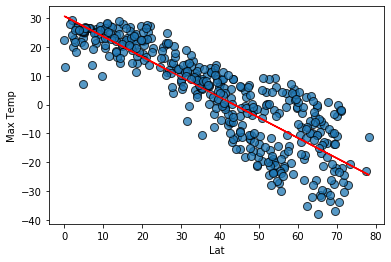

y = -0.71x + 30.75


In [15]:
# Linear regression on Northern Hemisphere
lin_reg_plot(northern_hemi_df, 'Lat', 'Max Temp')

The r-value is: 0.36869475805495433.


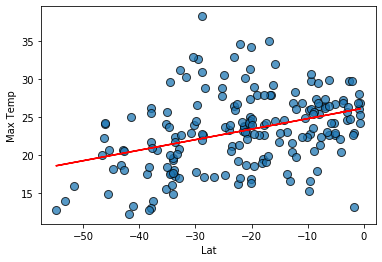

y = 0.14x + 26.19


In [16]:
# Linear regression on Southern Hemisphere
lin_reg_plot(southern_hemi_df, 'Lat', 'Max Temp')

**Discussion about the linear relationship:** It's possible to note a strong correlation between Latitude and Max Temperature on Northern Hemisphere. The same is not true on Southern Hemisphere, but a weak correlation. It's necessary some extra analysis to figure out why there is a difference between hemispheres.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.4204550547626962.


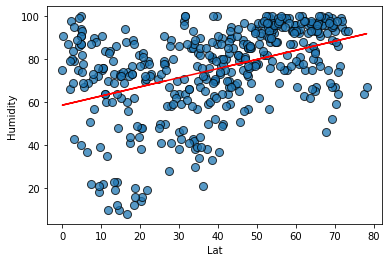

y = 0.43x + 58.62


In [17]:
# Northern Hemisphere
lin_reg_plot(northern_hemi_df, 'Lat', 'Humidity')

The r-value is: 0.3381186587555949.


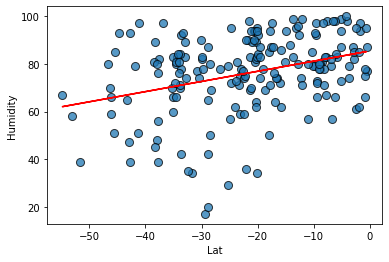

y = 0.43x + 85.45


In [18]:
# Southern Hemisphere
lin_reg_plot(southern_hemi_df, 'Lat', 'Humidity')

**Discussion about the linear relationship:** On these plots the correlation between Latitude and Humidity is weak on both hemispheres. But still a stronger correlation on Northern Hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.3269276444151616.


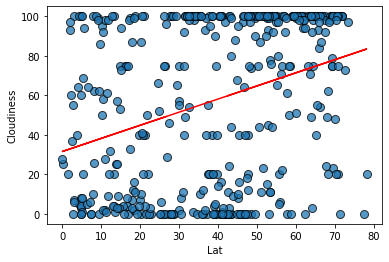

y = 0.66x + 31.55


In [19]:
# Northern Hemisphere
lin_reg_plot(northern_hemi_df, 'Lat', 'Cloudiness')

The r-value is: 0.21033820579009097.


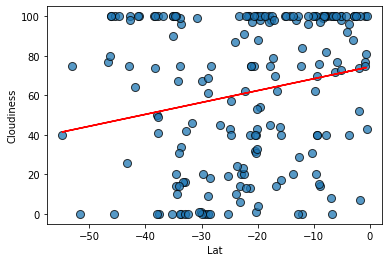

y = 0.6x + 74.42


In [20]:
# Southern Hemisphere
lin_reg_plot(southern_hemi_df, 'Lat', 'Cloudiness')

**Discussion about the linear relationship:** Comparing these plots it's possible to note a very weak to weak correlation between Latitude and Cloudiness. But still a stronger correlation on Northern Hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.03553719408240669.


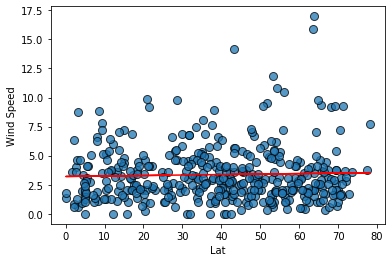

y = 0.0x + 3.2


In [21]:
# Northern Hemisphere
lin_reg_plot(northern_hemi_df, 'Lat', 'Wind Speed')

The r-value is: -0.3313034618018554.


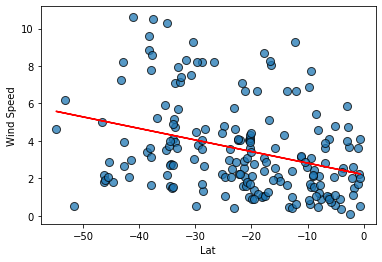

y = -0.06x + 2.2


In [22]:
# Southern Hemisphere
lin_reg_plot(southern_hemi_df, 'Lat', 'Wind Speed')

**Discussion about the linear relationship:** On Northern Hemisphere plot it's possible to note that there is no correlation between Latitude and Wind Speed. Even the Southern Hemisphere presenting a weak correlation, it's reasonable to say there is no correlation.